In [1]:
# Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data_adv = pd.read_csv('Advertising.csv', index_col=0)

In [3]:
data_adv

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [4]:
# If null values are present

data_adv.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

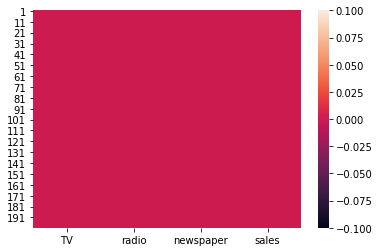

In [5]:
sns.heatmap(data_adv.isnull())

In [6]:
# Data extraction, wrangling and visualization

In [7]:
data_adv.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
data_adv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [10]:
# Visualization

label = data_adv['sales']
features = data_adv.drop(['sales'], axis=1)

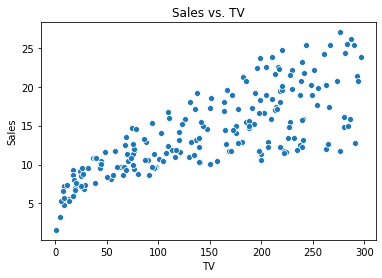

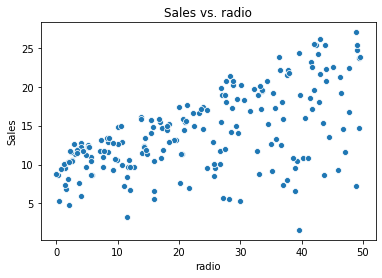

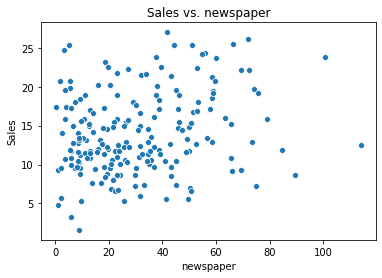

In [24]:
for i in features:
    sns.scatterplot(x=data_adv[i], y=label)
    
    plt.title("Sales vs. {0}".format(i))
    plt.xlabel(i)
    plt.ylabel("Sales")
    plt.show()

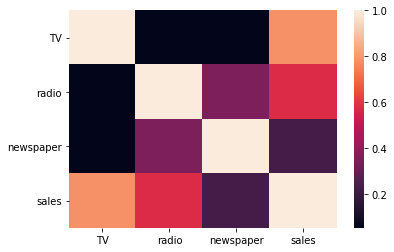

In [13]:
sns.heatmap(data_adv.corr())

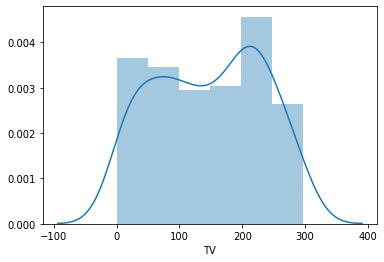

In [19]:
sns.distplot(data_adv['TV'], label="TV")

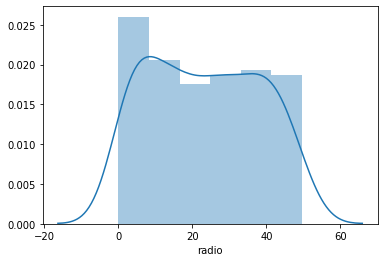

In [20]:
sns.distplot(data_adv['radio'], label="Radio")

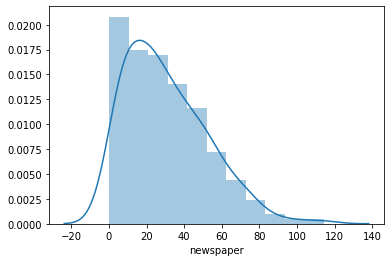

In [21]:
sns.distplot(data_adv['newspaper'], label="Newspaper")

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [26]:
lr_model = LinearRegression()
log_model = LogisticRegression()

In [27]:
X = data_adv.drop(['sales'], axis=1)
y = data_adv['sales']

In [29]:
lr_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
y_pred_lr = lr_model.predict(X)

In [33]:
y_lr = pd.DataFrame(y_pred_lr)
y_lr.head()

,0
0,20.523974
1,12.337855
2,12.307671
3,17.597830
4,13.188672


In [34]:
log_model.fit(X, y)

ValueError: Unknown label type: 'continuous'

# As LogisticRegression only works on categorical outcome

In [41]:
data_adv = data_adv.reset_index(level=None)
data_adv = data_adv.drop(['index'], axis=1)

In [42]:
data_adv.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [46]:
data_predicted = pd.concat([data_adv, y_lr], axis=1)
data_predicted = data_predicted.rename(columns={0: "Predicted sales"})

In [47]:
data_predicted

,TV,radio,newspaper,sales,Predicted sales
0,230.1,37.8,69.2,22.1,20.523974
1,44.5,39.3,45.1,10.4,12.337855
2,17.2,45.9,69.3,9.3,12.307671
3,151.5,41.3,58.5,18.5,17.597830
4,180.8,10.8,58.4,12.9,13.188672
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,5.370342
196,94.2,4.9,8.1,9.7,8.165312
197,177.0,9.3,6.4,12.8,12.785921
198,283.6,42.0,66.2,25.5,23.767321


In [48]:
lr_model.score(X, y)

0.8972106381789521